In [36]:
%matplotlib inline
import tweepy
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re
import langid as li
from guess_language import guess_language
from langdetect import detect  

In [2]:
consumer_key = "TM6dANbzBL5LzpXox05KJePwy"
consumer_secret = "HV3nuTA82M1tjTE2sKTeKPZ8kWDi5r4EgUGE4ogroinPcmfPqe"
access_key = "921130974569811968-RcDUIosERaFWnHHYw5C6OSq4aAGYdKi"
access_secret = "AOPClE7TtSHMuO8Jbs4TNhdxfEfPK5s3cbwnJpCE3s2v3"

In [3]:
def obtener_tweets(nombre):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    corpus_tweets = []
    batch_tweet = api.user_timeline(nombre,count=200)
    corpus_tweets.extend(batch_tweet)
    
    index_lst_tweet= batch_tweet[-1].id-1
    l_b_n=len(api.user_timeline(nombre,count=200,max_id=index_lst_tweet))
    
    while (True):
        batch_tweet = api.user_timeline(nombre,count=200,max_id=index_lst_tweet)
        corpus_tweets.extend(batch_tweet)
        if (len(batch_tweet)==0):
            break
        index_lst_tweet= batch_tweet[-1].id-1
    return corpus_tweets

In [44]:
def genarate_corpus(name_corpus,df):
    fo = open(name_corpus, "w")
    for i in df['Tweet']:
        texto_tweet=((i).decode("utf-8"))
        #print ((texto_tweet))
        texto_tweet= (re.sub(r'http\S+', '', texto_tweet))
        texto_tweet=texto_tweet+"\n"
        #print ((texto_tweet))
        idioma=(li.classify(texto_tweet)[0])
        if idioma=='es':
            fo.write(texto_tweet)
    fo.close()

In [5]:
def visualizacion_anio(df):
    counts = df['Fecha'].value_counts(sort=False)
    plt.bar(counts.index,counts)
    plt.title('Tweets por Año')
    plt.show()

                   ID Fecha                                              Tweet
0  921862159264600064  2017  b'I cannot stress enough gratitude to @WeCare4...
1  921854602491908096  2017  b'.@SenatorParker with great humility and resp...
2  921482664833667072  2017  b'.@realDonaldTrump hold on one sec! All news ...
3  921081801958985730  2017  b'Well done Dear Presidente Bush.What great de...
4  920954394870452224  2017  b'@potus in Sessions you have a tricky little ...


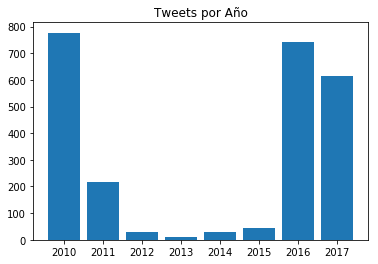

In [21]:
def main():
    #Se obtienen los tweets
    nombre_ob_tweets="vicentefoxque"
    corpus_tweets = obtener_tweets(nombre_ob_tweets)
    
    #Se quitan los RT
    corpus_tweets_filtrados = [[tt.id_str, tt.created_at, tt.text.encode("utf-8")] for tt in corpus_tweets if 'RT @' not in tt.text ]
    
    #Se construye un DataFrame con los campos de : 'ID','Fecha','Tweet'
    df = pd.DataFrame(corpus_tweets_filtrados,columns=['ID','Fecha','Tweet'])
    df['Fecha']=df['Fecha'].apply(lambda x:x.strftime('%Y'))
    
    # Un top 5 del DataFrame
    print (df.head(5))
    # Tweets por anio.
    visualizacion_anio(df)
    
    # Se guarda el dataframe en un CSV. 
    df.to_csv("Tweets_Hist_"+nombre_ob_tweets+".csv", sep='\t', encoding='utf-8')
    
    # Se genera el corpus
    genarate_corpus("Corpus_Tweets_"+nombre_ob_tweets+".txt",df)

main()